# npTDMS code snippets

<code>conda install -c conda-forge nptdms</code>

webpage
https://nptdms.readthedocs.io/en/stable/index.html

weblink documentation
https://nptdms.readthedocs.io/en/stable/reading.html

In [54]:
# Imports
import os
from pathlib import Path # for filename withput extension

import numpy as np
import pandas as pd

import nptdms
from nptdms import TdmsFile

import time
from time import sleep
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as md

# tqdm progress bar
from tqdm import tqdm
from tqdm import trange
from colorama import Fore

import math # for rounding up/down ceil/floor function

from IPython import get_ipython
#displays the plot in the notebook itself, immediately below the cell that creates the plot:
get_ipython().run_line_magic('matplotlib', 'inline') 
#get_ipython().run_line_magic('matplotlib', 'qt')

DATA_DIR = r"C:\Users\crtom\Documents\npTDMS.git\data"
FILENAME = r"DAQ-sim"
FILEPATH = os.path.join(DATA_DIR, FILENAME + ".tdms")

# READ TDMS PROPERTIES

In [66]:
# Open and read complete tdms file
print("\n---Open and read in memory complete tdms file---")
tdms_file = TdmsFile.read(FILEPATH)
print(tdms_file)

# you dont nned to open file to read metadata
print("\n---metadata---")
tdms_file = TdmsFile.read_metadata(FILEPATH)
print(metadata.properties)

# get groups, channels
print("\n---groups, channels---")
all_groups = tdms_file.groups()
all_group_channels = group.channels()
print(all_groups)
print(all_group_channels)

print("\n---properties---")
for name, value in tdms_file.properties.items():
    print("{0}: {1}".format(name, value))

print("\n---iterate trough groups---")
# DAQ data has only one group
for group in tdms_file.groups():
    print(group)
    print(group.name)

print("\n---iterate trough channels---")
for channel in group.channels():
    print(channel)
    print(channel.name)
    properties = channel.properties
    #print(properties)

print("\n---all channel properties---")
for x,y in properties.items():
    print(x," = ",y)
    
# Accessing a single propertie
print("\n---single channel propertie---")
NI_ChannelName = channel.properties['NI_ChannelName']
NI_UnitDescription = channel.properties['NI_UnitDescription']
wf_start_time = channel.properties['wf_start_time']
print("NI_ChannelName = ", NI_ChannelName)
print(NI_UnitDescription)
print(wf_start_time)


---Open and read in memory complete tdms file---

---metadata---
OrderedDict([('name', 'DAQ-sim')])

---groups, channels---
[<TdmsGroup with path /'analog'>]
[<TdmsChannel with path /'analog'/'U'>, <TdmsChannel with path /'analog'/'I'>, <TdmsChannel with path /'analog'/'T'>]

---properties---
name: DAQ-sim

---iterate trough groups---
<TdmsGroup with path /'analog'>
analog

---iterate trough channels---
<TdmsChannel with path /'analog'/'U'>
U
<TdmsChannel with path /'analog'/'I'>
I
<TdmsChannel with path /'analog'/'T'>
T

---all channel properties---
NI_Scaling_Status  =  unscaled
NI_Number_Of_Scales  =  2
NI_Scale[1]_Scale_Type  =  Linear
NI_Scale[1]_Linear_Slope  =  0.00030518043793392844
NI_Scale[1]_Linear_Y_Intercept  =  0.0
NI_Scale[1]_Linear_Input_Source  =  0
NI_ChannelName  =  T
unit_string  =  Volts
NI_UnitDescription  =  Volts
wf_start_time  =  2020-11-23T15:40:39.013576
wf_increment  =  0.01
wf_start_offset  =  0.0
wf_samples  =  1

---single channel propertie---
NI_Channel

# READ TDMS to dataframe

In [76]:
tdms_file = TdmsFile.read(FILEPATH)
print(tdms_file)

for group in tdms_file.groups():
    group_name = group.name

signal_data_df = tdms_file[group_name].as_dataframe()
   
# get time data
date_time_dt64 = channel.time_track(absolute_time = True)#, accuracy='ns'
test_time_dt64 = channel.time_track(absolute_time = False)
        
# convert tim = numpy array to pandas df
date_time_df = pd.DataFrame(date_time_dt64, columns = ['date_time'])
test_time_df = pd.DataFrame(test_time_dt64, columns = ['test_time'])
        
# merge date_time, test_time and data
tdms_df = pd.concat([date_time_df, test_time_df, signal_data_df], axis=1).reindex(date_time_df.index)

print(tdms_df.head())
print(tdms_df.keys())
print(tdms_df.shape)
type(tdms_df)

#tdms_df.to_excel("test.xlsx")

                   date_time  test_time         U         I         T
0 2020-11-23 15:40:39.013576       0.00 -0.012207  0.755322  1.921721
1 2020-11-23 15:40:39.023576       0.01 -0.134890  1.121233  1.870451
2 2020-11-23 15:40:39.033576       0.02 -0.090028  0.766003  2.097200
3 2020-11-23 15:40:39.043576       0.03 -0.114443  0.732433  1.790494
4 2020-11-23 15:40:39.053576       0.04  0.304570  1.152056  1.723354
Index(['date_time', 'test_time', 'U', 'I', 'T'], dtype='object')
(3240, 5)


pandas.core.frame.DataFrame

U
I
T


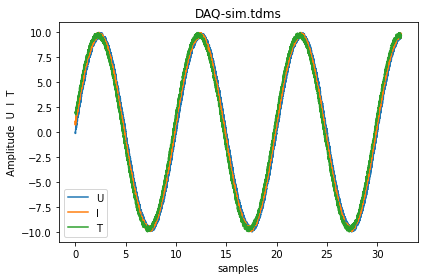

In [80]:
fig = plt.figure()
ax = plt.subplot(111)

for channel in group.channels():
    tdms_df.plot(kind='line', x="test_time", y=channel.name, ax=ax)
    #print(channel.name)
        
# set title, axis legend
plt.title("DAQ-sim.tdms")
plt.xlabel("samples")
plt.ylabel(" Amplitude "+" U "+" I "+" T ")
    
fig.tight_layout()
# save current plot to file
plt.savefig('output.png', dpi=300, bbox_inches='tight')

plt.show()

# Typical usage when reading a TDMS

In [82]:
for group in tdms_file.groups():
    group_name = group.name
    print(group_name)
    for channel in group.channels():
        channel_name = channel.name
        print(channel_name)
        # Access dictionary of properties:
        properties = channel.properties
        # Access numpy array of data for channel:
        data = channel[:]
        # Access a subset of data
        data_subset = channel[0:5]
        print(data_subset)


analog
U
[-0.01220722 -0.13488975 -0.09002823 -0.11444266  0.30457008]
I
[0.75532158 1.12123293 0.7660029  0.73243305 1.15205615]
T
[1.92172122 1.8704509  2.09719997 1.79049363 1.72335393]


## access a channel by group name and channel name directly


In [4]:
group_name = "analog"
channel_name = "U"

group = tdms_file[group_name]
channel = group[channel_name]

print(group)
print(channel)

<TdmsGroup with path /'analog'>
<TdmsChannel with path /'analog'/'U'>


## The TdmsFile.read method reads all data into memory immediately. When you are working with large TDMS
files or don’t need to read all channel data, you can instead use TdmsFile.open. This is more memory efficient but
accessing data can be slower:

In [5]:
group_name = "analog"
channel_name = "U"

with TdmsFile.open("DAQ-sim.tdms"):
    channel = tdms_file[group_name][channel_name]
    channel_data = channel[:]
    print(channel_data.shape)
    print(channel_data[0:5])

(3240,)
[-0.01220722 -0.13488975 -0.09002823 -0.11444266  0.30457008]


In [6]:
# 1.2.2 Timestamps, page 6 of documentation
# importing datetime from datetime module 
import datetime 
#from datetime import datetime 
import arrow #Arrow: Better dates & times for Python

timestamp = channel.properties['wf_start_time']

#datetimeObj = datetime.strptime('2018-09-11T15::11::45.456777', '%Y-%m-%dT%H::%M::%S.%f')
local_time = arrow.get(timestamp.astype(datetime.datetime)).to('local')
#print(local_time.format())

Hz = 100
dt = 1/Hz
# make up some data
#x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]
x = [local_time + datetime.timedelta(seconds=dt*i) for i in range(12)]
print(x[0:2])

print(timestamp)
print(datetime.datetime.now())

#datetimeObj = datetime.strptime('2018-09-11T15::11::45.456777', '%Y-%m-%dT%H::%M::%S.%f')
#print(datetimeObj)
#print(type(datetimeObj))


[<Arrow [2020-11-23T16:40:39.013548+01:00]>, <Arrow [2020-11-23T16:40:39.023548+01:00]>]
2020-11-23T15:40:39.013548
2020-11-27 08:36:51.027438


3239
type(timestamps ): 
<class 'numpy.ndarray'>
type(now): 
<class 'numpy.float64'>
type(duration): 
<class 'int'>
type(n): 
<class 'numpy.int64'>
type(dates): 
<class 'list'>


C:\Users\crtjur\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


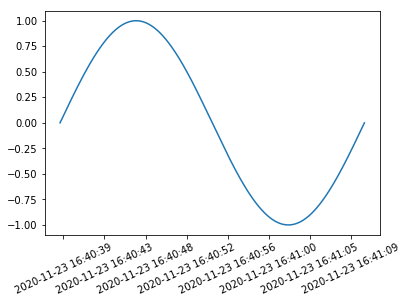

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time

%matplotlib inline

n = df.index.values.max()
print(n)
duration = int(n/100)

#n = 10 #20 number of samples
#duration = 100 #1000 i nseconds


# read start timestamp from tdms. This timestamp is numpy.datetime64
dt64 = channel.properties['wf_start_time']
"""
print("type(dt64): ")
print(type(dt64))
"""

now = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    
#print("Timestamp:")
#print(now)
#print("UTC from Timestamp:")
#print(datetime.utcfromtimestamp(now))

timestamps = np.linspace(now, now + duration, n)
print("type(timestamps ): ")
print(type(timestamps ))

print("type(now): ")
print(type(now))

print("type(duration): ")
print(type(duration))

print("type(n): ")
print(type(n))

dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
print("type(dates): ")
print(type(dates))

datenums=md.date2num(dates)
#print(datenums)

values=np.sin((timestamps-now)/duration*2*np.pi)

plt.subplots_adjust(bottom=0.1)
plt.xticks( rotation=25 )

ax=plt.gca()

xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums,values)
plt.show()